# Lab3 Кожуро Б Е

Для работы был выбран датасет Cancer

In [1]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_boston
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, RepeatedKFold, LeaveOneOut, LeavePOut, ShuffleSplit, StratifiedKFold
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import learning_curve, validation_curve
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
from sklearn.datasets import *
cancer = load_breast_cancer()

In [3]:
for x in cancer:
    print(x)

data
target
frame
target_names
DESCR
feature_names
filename


In [4]:
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [5]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

## создание выборок

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=1)

In [8]:
X_train.shape, Y_train.shape

((455, 30), (455,))

In [9]:
X_test.shape, Y_test.shape

((114, 30), (114,))

## обучение
Поскольку target в данном случае - непрерывен 

In [11]:
class_set = KNeighborsClassifier(n_neighbors=3)
class_set.fit(X_train, Y_train)
target_set_0 = class_set.predict(X_train)
target_set_1 = class_set.predict(X_test)
len(target_set_1), target_set_1

(114,
 array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
        1, 1, 1, 1]))

## Метрики

In [12]:
accuracy_score(Y_test, target_set_1)

0.9210526315789473

In [13]:
confusion_matrix(Y_test, target_set_1, labels=[0, 1])

array([[36,  6],
       [ 3, 69]], dtype=int64)

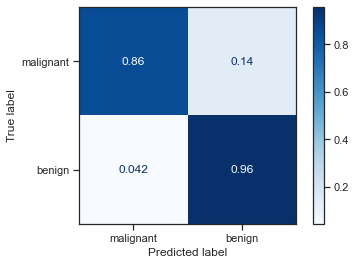

In [14]:
plot_confusion_matrix(class_set, X_test, Y_test, 
                      display_labels=cancer.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

In [15]:
f1_score(Y_test,target_set_1)

0.9387755102040817

Выборка довольно точна, и точность 0.93 - приемлема

## Выбор гиперпараметра

In [16]:
n_range = np.array(range(2,30,3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])}]

In [17]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=RepeatedKFold(n_splits=10, n_repeats=5), scoring='accuracy')
clf_gs.fit(cancer.data, cancer.target)

Wall time: 2.07 s


GridSearchCV(cv=RepeatedKFold(n_repeats=5, n_splits=10, random_state=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])}],
             scoring='accuracy')

In [18]:
clf_gs.best_score_, clf_gs.best_params_

(0.9342919799498746, {'n_neighbors': 11})

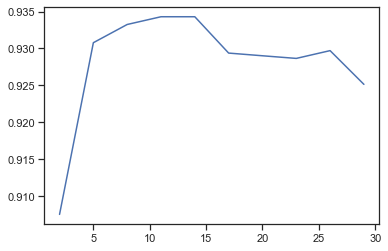

In [19]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [20]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=ShuffleSplit(n_splits=10), scoring='accuracy')
clf_gs.fit(cancer.data, cancer.target)

Wall time: 422 ms


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=None, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])}],
             scoring='accuracy')

In [21]:
clf_gs.best_score_, clf_gs.best_params_

(0.9228070175438597, {'n_neighbors': 8})

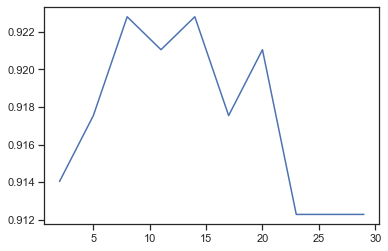

In [22]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [23]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(cancer.data, cancer.target)

Wall time: 15.6 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29])}],
             scoring='accuracy')

In [24]:
clf_gs.best_score_, clf_gs.best_params_

(0.9367311072056239, {'n_neighbors': 14})

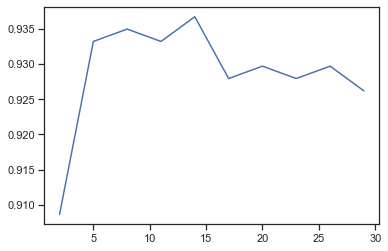

In [25]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

По результатам стратегий Loo получили 14, ShuffleSplit получили лучшее значение параметров 11, Kfold дал 8.

In [26]:
%%time
n_range = np.array(range(1,15,1))
tuned_parameters = [{'n_neighbors': n_range}]
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring='accuracy')
clf_gs.fit(cancer.data, cancer.target)

Wall time: 21.6 s


GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])}],
             scoring='accuracy')

In [27]:
clf_gs.best_score_, clf_gs.best_params_

(0.9367311072056239, {'n_neighbors': 10})

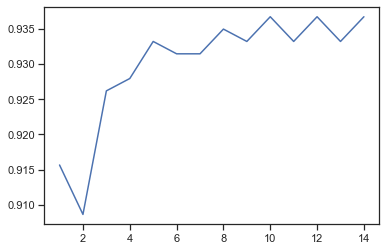

In [28]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

Сравниваем показатели:  лучшее количество дало 10, с точностью 0,936. Лучше, чем 0.921 для 2

In [29]:
clf_gs.best_estimator_.fit(X_train, Y_train)
target2_0 = clf_gs.best_estimator_.predict(X_train)
target2_1 = clf_gs.best_estimator_.predict(X_test)

In [30]:
accuracy_score(Y_train, target2_0), accuracy_score(Y_test, target2_1)

(0.9362637362637363, 0.9298245614035088)

In [31]:
accuracy_score(Y_train, target_set_0), accuracy_score(Y_test, target_set_1)

(0.9516483516483516, 0.9210526315789473)

In [32]:
def plot_validation_curve(estimator, title, X, y, 
                          param_name, param_range, cv, 
                          scoring="accuracy"):
                                                   
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring=scoring, n_jobs=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel(str(scoring))
    plt.ylim(0.0, 1.1)
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.4,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    return plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.3,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\ksarb\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

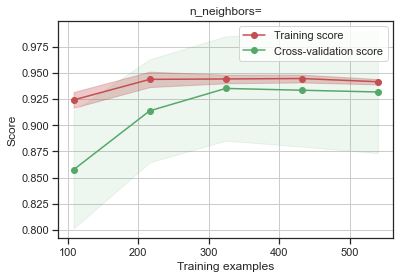

In [33]:
plot_learning_curve(clf_gs.best_estimator_, 'n_neighbors=', 
                    cancer.data, cancer.target, cv=20, train_sizes=np.linspace(.2, 1.0, 5))

<module 'matplotlib.pyplot' from 'C:\\Users\\ksarb\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

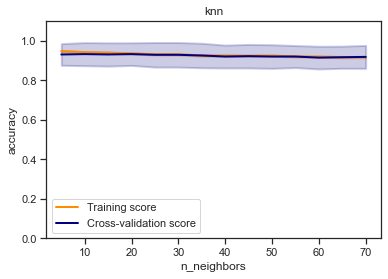

In [34]:
n_range2 = np.array(range(5,75,5))
plot_validation_curve(clf_gs.best_estimator_, 'knn', 
                      cancer.data, cancer.target, 
                      param_name='n_neighbors', param_range=n_range2, 
                      cv=20, scoring="accuracy")

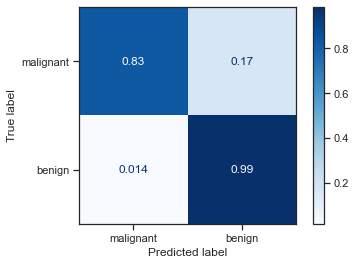

In [35]:
plot_confusion_matrix(clf_gs.best_estimator_, X_test, Y_test,
                      display_labels=cancer.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

## Вывод
В итоге лучшим количеством соседей для данной модели является 10. При таком распределении точность составляет 93.8%. При этом почти нет ложноотрицательных, зато возросло количество ложноположительных.

 для раковых больных такой тест был бы не очень, 17% ложноположительных - довольно неприятно. 